# <center>🔶 **Logistic Regression (binary classification) (Polynomial Input) (Non Linear Classification Model)**</center>


## 🧠 1. What is Logistic Regression?

Despite the name “Regression,” **Logistic Regression** is a **classification algorithm**, not a regression one.  
It is used when the **target (dependent variable)** is **categorical** — typically **binary** (0 or 1).

💡 Example:  
Predict whether an email is *spam (1)* or *not spam (0)*.  
Input: number of links, special words, etc.

---



## 📉 2. Linear vs Logistic Regression

| Aspect | Linear Regression | Logistic Regression |
|--------|--------------------|--------------------|
| Output | Continuous (e.g., 0.54, 13.2, etc.) | Probability (between 0 and 1) |
| Function | $ y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n $ | $ z = \beta_0 + \beta_1x_1 + ... + \beta_nx_n $, then $ \sigma(z) = \frac{1}{1+e^{-z}} $ |
| Prediction | Direct numeric output | Threshold (e.g., ≥ 0.5 → class 1, else 0) |

---



## ⚙️ 3. The Sigmoid Function

The **sigmoid (logistic)** function converts any real number into a range between 0 and 1:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

👉 If $ z = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... $,  
then output $ h(x) = \sigma(z) $ is interpreted as the **probability** that the output belongs to class 1.

**Example:**
- $ h(x) = 0.85 $ → 85% chance class = 1  
- $ h(x) = 0.2 $ → 20% chance class = 1 (so likely class = 0)

---



## 📈 4. Decision Boundary

A **decision boundary** separates classes.  

- For *simple logistic regression*: boundary is a **straight line** (linear combination of inputs).  
- For *polynomial logistic regression*: boundary can be **curved**, allowing nonlinear separation.

### Example:
If you use polynomial features like $ x_1^2, x_2^2, x_1x_2 $,  
then the model can learn **nonlinear boundaries** such as circles or ellipses.

---



## 💰 5. Cost Function (Log Loss)

Linear regression uses MSE, but here we use **Log Loss (Cross-Entropy Loss)**:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(h_\theta(x^{(i)})) + (1-y^{(i)}) \log(1 - h_\theta(x^{(i)}))]
$$

- $ h_\theta(x) $: predicted probability (sigmoid output)  
- $ y $: actual label (0 or 1)  
- $ m $: number of samples  

This penalizes wrong confident predictions more heavily.

---



## 🔁 6. Gradient Descent Optimization

To minimize the cost $ J(\theta) $, we update parameters iteratively:

$$
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
$$

where $ \alpha $ = learning rate.

---



## 🧩 7. Polynomial Inputs (Feature Mapping)

When data isn’t linearly separable, we **add polynomial terms** manually or with tools. 
Tools like **`from sklearn.preprocessing import PolynomialFeatures`**

For example, instead of:
$$
x = [x_1, x_2]
$$
we can expand it to:
$$
x = [x_1, x_2, x_1^2, x_2^2, x_1x_2]
$$

This gives the model flexibility to fit curved decision boundaries.


## 8️⃣ Using `make_circles` to create a synthetic polynomial dataset for Polynomial Logistic Regression

In [133]:
#step 1 Import Libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [134]:
#step2: creating synthetic dataset
x, y = make_circles(n_samples = 300, noise = 0.1, factor = 0.5, random_state = 0)

## 🌟🌟 NOTE: Explanation of the above code

### **What `make_circles` produces (quick overview)**
`make_circles` produces a toy 2-D dataset of points arranged in two concentric circles (one inner circle, one outer circle).

- `X` is a NumPy array of shape `(n_samples, 2)` — the 2D coordinates of each point.

- `y` is an array of length `n_samples` with labels `0` or `1` (which circle the point belongs to).
This dataset is commonly used to demo non-linearly separable problems (e.g., to show why linear classifiers fail and kernel methods or neural nets are useful).

---
# `make_circles` Parameters Overview

| Parameter       | Description                                       | Purpose / Effect                                  | Typical Values / Notes                                  |
|-----------------|-------------------------------------------------|-------------------------------------------------|--------------------------------------------------------|
| **n_samples**   | Total points generated (both circles combined). | Controls dataset size. Larger → smoother data; smaller → faster demos. | Default: 100; odd values split classes unevenly.       |
| **noise**       | Std deviation of Gaussian noise on points.      | Adds scatter/noise for realism; controls classification difficulty. | 0.0 (perfect circles), 0.05 (slight scatter), 0.1 (default moderate), 0.5 (heavy noise) |
| **factor**      | Inner circle radius relative to outer circle.   | Controls circle size & class separation.         | Near 0 = tiny inner circle; 0.5 = half radius; near 1 = overlapping classes |
| **random_state**| Seed for random number generator.                | Ensures reproducible results.                     | Integer seed (e.g., 0) or None for random variation.   |
| **shuffle**     | Whether to shuffle samples and labels.           | Mixes class labels for randomness in output.     | Default: True                                          |
| **noise=None**  | Option to add no noise.                           | Produces perfect circles without scatter.        | noise=None disables noise addition.                    |

## Output Data Shapes

| Output | Description                        | Shape / Type                  |
|--------|----------------------------------|-------------------------------|
| `X`    | Coordinates of points             | `(n_samples, 2)`, dtype=float64 |
| `y`    | Class labels (inner=1, outer=0)  | `(n_samples,)`, dtype=int      |



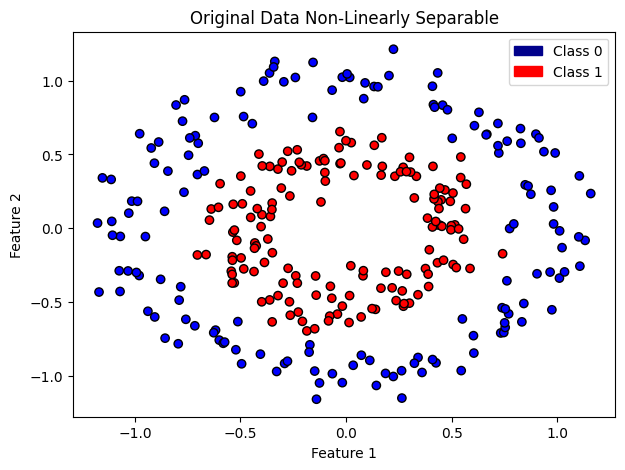

In [135]:
# Now Visualizing raw data

plt.figure(figsize = (7,5))
plt.scatter(x[:, 0], x[:, 1], c = y, cmap = 'bwr', edgecolors='k')
plt.title("Original Data Non-Linearly Separable")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Creating custom legend handles with colors matching the colormap
import matplotlib.patches as mpatches

blue_patch = mpatches.Patch(color='darkblue', label='Class 0')
red_patch = mpatches.Patch(color='red', label='Class 1')

plt.legend(handles=[blue_patch, red_patch])

plt.show()


### 🌟🌟🌟 Explanation for the above:

| Parameter       | Description                                    | Purpose / Effect                                            | Typical values / Notes                                         |
|-----------------|------------------------------------------------|------------------------------------------------------------|---------------------------------------------------------------|
| `x[:, 0]`       | First feature (column) of the dataset `x`       | Represents the x-coordinates of the points to be plotted     | 300 samples from `make_circles`, values typically between -1 and 1 |
| `x[:, 1]`       | Second feature (column) of the dataset `x`      | Represents the y-coordinates of the points to be plotted     | Same as above, paired with `x[:, 0]` for 2D points              |
| `c = y`         | Class labels array generated by `make_circles` | Colors points according to their class label (0 or 1)        | Binary classes: 0 (inner circle), 1 (outer circle)              |
| `cmap = 'bwr'`  | Colormap used to map class labels to colors     | Visual distinction between classes using Blue-White-Red color scheme | Blue for class 0, Red for class 1, White intermediate          |
| `edgecolors='k'`| Edge color of scatter points                     | Adds black border to each point for better visual clarity    | `'k'` stands for black color                                   |


Plot Interpretation: **We can clearly see that data doesn't exhibits the linear relationship at all**

In [136]:
# step 3: Creating Polynomial features

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(x)

In [137]:
# step 4: Now Splitting the data for train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size= 0.2, random_state = 42)

In [138]:
#step 5: Training Logistic Regression model

from sklearn.linear_model import LogisticRegression

lor = LogisticRegression()
lor.fit(x_train, y_train)

LogisticRegression()

In [139]:
# step 6:Now Predictions
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = lor.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")



Accuracy: 0.9666666666666667
Confusion Matrix:
 [[35  2]
 [ 0 23]]


In [140]:
# Step 6: Plot Decision Boundary using the mlxtend.plotting.plot_decision_regions
 
from mlxtend.plotting import plot_decision_regions

## 🤯 The problem which we can face while plotting the graph with plot_decision_regions because of the polynomial nature of data:

- we trained `lor` on `x_train` (polynomial features, 10 dims)  
- we want to plot decision regions on **original 2D features `X`**  
- `plot_decision_regions`, `clf parameter` calls `model.predict()` on the 2D meshgrid points directly (with 2 features) — but our model expects 10 features → error.

---

### **Solution:** Wrapping the model to apply polynomial transform on inputs before predicting

This way we can pass original 2D points to the plotting function, but behind the scenes our model will receive the transformed features it expects.


In [141]:
class PolyModelWrapper:
    def __init__(self, model, poly):
        self.model = model
        self.poly = poly
    
    def predict(self, x_input):
        # transforming the input before predicting
        x_poly_input = self.poly.transform(x_input)
        return self.model.predict(x_poly_input)
    
    #Also implementing predict_proba if needed by mlxtend internals
    
    def predict_proba(self, x_input):
        x_poly_input = self.poly.transform(x_input)
        return self.model.predict_proba(x_poly_input)




# Now Instantiating the wrapped model

wrapped_model = PolyModelWrapper(lor, poly) 


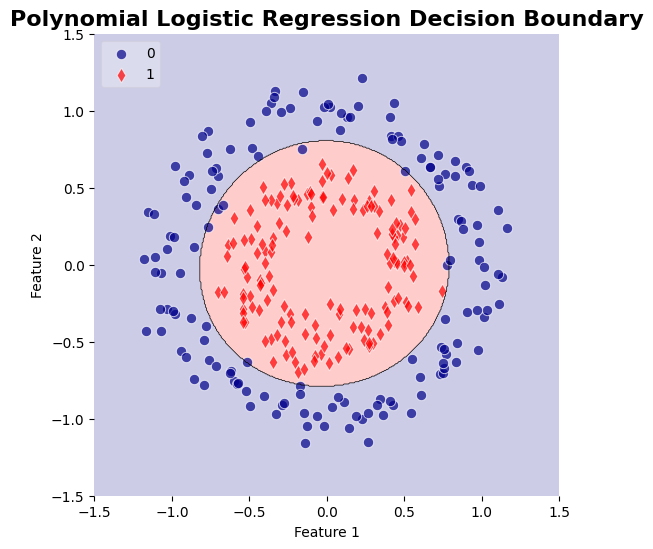

In [ ]:
# Plotting decision boundary on original 2D features using wrapped model
plt.figure(figsize = (6,6))

plot_decision_regions(
    X=x, 
    y=y, 
    clf = wrapped_model, 
    markers = "od", #to select the markers
    colors = "darkblue,red", #colors for the two makers
    legend = 2,
    scatter_kwargs = {'s' : 55, 'alpha' : 0.7, 'edgecolor': 'white', 'linewidth' : 0.7 },
    contourf_kwargs = {"alpha": 0.2} # adjusts the transparency of background regions
    )


plt.title("Polynomial Logistic Regression Decision Boundary", fontsize = 16, fontweight= 'bold')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.ylim(top = 1.5, bottom = -1.5)
plt.xlim(left = -1.5, right = 1.5)
plt.show()



## ⚙️ **NOTE FOR ABOVE PLOT In Context with Polynomial Logistic Regression being a Linear model but not a linear Classification model. Model in itself linear but due to the crietria on the basis of which the ml model are categorized into linear and non-linear classification model doesn't fit to Logistic Regression model so it is a non-linear classification model:**

When we talk about **Logistic Regression**, it’s important to understand **what is linear and what is not**.

---

### 🧠 1. Logistic Regression *is* a linear classifier in its **feature space**

The *decision boundary* of Logistic Regression is **linear in the feature space it is trained on**.  
Mathematically, it’s based on the equation:

$$
z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n
$$
and the decision boundary is defined by:
$$
z = 0 \Rightarrow \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n = 0
$$

That’s a **linear equation** — so logistic regression is *always* a linear classifier in the space it sees.

---

### 🎨 2. But with **Polynomial Features**, the *feature space itself* becomes nonlinear in original terms

When you use:

```python
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
```
You’re transforming your inputs like:

$$
X = [x_1, x_2] \quad \rightarrow \quad X_{poly} = [1, x_1, x_2, x_1^2, x_2^2, x_1x_2, x_1^3, x_1^2x_2, x_1x_2^2, x_2^3]
$$

Now, logistic regression is still linear **in terms of these 10 features**, but when you map it back to the **original input space** $(x_1, x_2)$ — the boundary appears **nonlinear**, like circles or curves.

###  🔮 3. So what we observe is correct :

- Yes, the **decision boundary** on our plot looks **circular**.  
- That’s because you added **polynomial (nonlinear) transformations** of `x₁` and `x₂`.  
- But the **classifier itself** is still a **linear model** in the **transformed polynomial feature space**.

---

### ⚖️ So we can say that :

> #  🌟🌟🌟 **NOTE ➡️** “Polynomial Logistic Regression is a **linear model applied in a nonlinear feature space** — which results in a **nonlinear decision boundary** in the original input space.” But still categorized as a non-linear classification model since the categorization in on the basis of the linearity of decision boundary

### 👊 Analogy

| Space             | Features                    | Boundary Type                      |
| ----------------- | --------------------------- | ---------------------------------- |
| Original space    | (x₁, x₂)                    | Nonlinear (circle, parabola, etc.) |
| Transformed space | (x₁, x₂, x₁², x₂², x₁x₂, …) | Linear (a flat hyperplane)         |




## 🔥🔥🔥 **Classification algorithms can be broadly categorized into **Linear** and **Non-Linear** models `based on the shape of their decision boundary` — that is, how they separate different classes in the feature space. Becuase of which Polynomial Logistic Regression falls under the category of Non-linear classification model because the categorization is happening on the basis of the shape of their decision boundary**


# Classification Algorithms: Linear vs Non-Linear Models

Classification algorithms can be broadly categorized into **Linear** and **Non-Linear** models based on the **shape of their decision boundary** — that is, how they separate different classes in the feature space.

---

## In which category does Polynomial Logistic Regression lie?


**Polynomial Logistic Regression** lies in the category of **Non-Linear Classification Models.**

---

### 🧠 Here’s why:

#### 1️⃣ Logistic Regression itself
- **Standard Logistic Regression** is a **linear model**.  
- It models the **log-odds (logit)** of the target as a *linear combination* of the input features:

$$
\text{logit}(p) = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n
$$

Hence, its **decision boundary** is **linear** (e.g., a straight line in 2D).

---

#### 2️⃣ Polynomial Logistic Regression
- In **Polynomial Logistic Regression**, we **add polynomial terms** (like \(x_1^2\), \(x_2^2\), \(x_1x_2\), etc.) as **new features**.
  
  For example:

$$
\text{logit}(p) = \beta_0 + \beta_1x + \beta_2x^2
$$

- After this transformation, the model still performs **linear logistic regression** — but now on **polynomially transformed features**.

---

#### ⚙️ The effect:
- In the **original input space**, the resulting **decision boundary becomes non-linear**.
- So, although the algorithm is *mathematically linear* in its coefficients, its **behavior** in the feature space is **non-linear**.

---

### 🔍 Final Categorization:

| Model | Linear / Non-Linear | Reason |
|:--|:--|:--|
| Logistic Regression | **Linear** | Linear decision boundary in feature space |
| Polynomial Logistic Regression | **Non-Linear** | Non-linear decision boundary due to polynomial feature transformation |
| k-NN, SVM with RBF kernel, Decision Tree | **Non-Linear** | Directly or implicitly create complex, non-linear decision boundaries |

---

### 🧩 Intuitive Analogy
Think of **Polynomial Logistic Regression** as “bending” the feature space using polynomial terms so that a straight line in this new bent space corresponds to a curved line in the original space.

---

## Why do we categorize Polynomial Logistic Regression as non-linear when it is linear in parameters?

Excellent reasoning — 👏 you’ve touched on a **deep and subtle distinction** between *model linearity in parameters* and *linearity in feature space / decision boundary shape*.  
Let’s break this down carefully 👇  

---

## ⚙️ Two Different Notions of “Linearity”

### 1️⃣ **Linearity in Parameters (Model Form)**
A model is **linear in parameters** if the parameters (coefficients) appear only to the **first power**, i.e., no multiplications or nonlinear functions of parameters.

For example:
$$
y = \beta_0 + \beta_1 x + \beta_2 x^2
$$
This model is **linear in parameters** (\(\beta_0, \beta_1, \beta_2\)) — even though it’s *non-linear in features*.

✅ So yes, **Polynomial Logistic Regression is linear in parameters**.

---

### 2️⃣ **Linearity in the Feature Space (Decision Boundary)**
However, when we talk about a classification model being **linear or non-linear**,  
we usually refer to **the shape of its decision boundary in the *original input space***.

That is:
- If the **decision boundary is a straight line (or a hyperplane)** → **Linear classifier**
- If the **decision boundary is curved or complex** → **Non-linear classifier**

---

## 🧠 How This Applies to Polynomial Logistic Regression

Let’s write the logit equation for **polynomial logistic regression**:

$$
\text{logit}(p) = \beta_0 + \beta_1x + \beta_2x^2
$$

- This equation is **linear in parameters** (\(\beta_0, \beta_1, \beta_2\)) ✅  
- But **non-linear in the original feature** \(x\) ❌

When you solve for the decision boundary (i.e., \(p = 0.5\)), you get a **non-linear curve** in the original \(x\)-space.

Hence, even though the model *mathematically remains linear in parameters*, its **decision boundary** (which matters for classification) becomes **non-linear**.

---

## 🧩 Summary Table

| Concept | Logistic Regression | Polynomial Logistic Regression |
|:--|:--|:--|
| Linear in Parameters | ✅ Yes | ✅ Yes |
| Linear in Features (Decision Boundary) | ✅ Yes | ❌ No |
| Decision Boundary Shape | Straight line / plane | Curved / complex |
| Classification Type | Linear classifier | Non-linear classifier |

---

## 💡 So the takeaway:
> “Polynomial Logistic Regression is **linear in parameters** but **non-linear in the input space** — therefore, it is categorized as a **non-linear classification model**.”

---

Would you like me to visualize this concept — showing how a linear logistic regression draws a straight decision boundary while a polynomial one curves it — using a simple 2D plot?


## 🛡️ 9. **Regularization (to prevent overfitting)**

When we add polynomial features, the number of parameters explodes — leading to overfitting.

Regularization helps:

**Ridge (L2) Regularization:**

$$
J(\theta) = \text{LogLoss} + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2
$$

```python
    model = LogisticRegression(C=0.1, penalty='l2')  # smaller C → stronger regularization
```

---


In [ ]:
model = LogisticRegression(C = 0.1, penalty='l2') # smaller C → stronger regularization
# note LogisticRegression works with penalty as l2

In [167]:
model.fit(x_train,y_train)

LogisticRegression(C=0.1)

In [168]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")



Accuracy: 0.9333333333333333
Confusion Matrix:
 [[33  4]
 [ 0 23]]


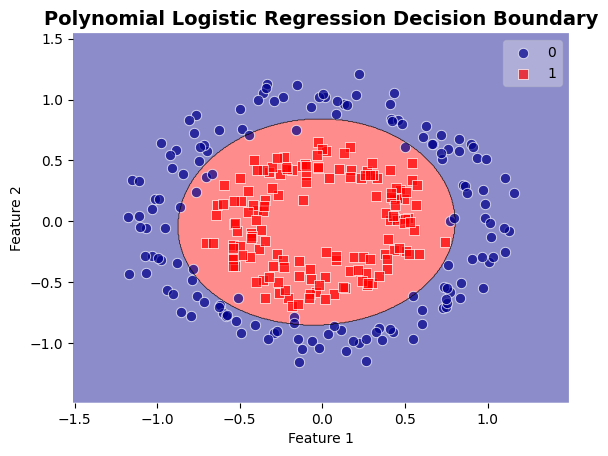

In [171]:
wrapped_model1 = PolyModelWrapper(model, poly)

# plotting decision boundary on original 2D features using wrapped model
# from mlxtend.plotting import plot_decision_regions

plot_decision_regions(
    X=x,
    y=y,
    clf = wrapped_model1,
    markers = "os",
    colors = "darkblue,red",
    zoom_factor = 3.0,
    legend = 1,
    scatter_kwargs = {'s': 55, 'alpha': 0.7, 'edgecolor' : 'white', 'linewidth' : 0.7},
    contour_kwargs = {"alpha" : 0.9}
    
)

plt.title("Polynomial Logistic Regression Decision Boundary", fontsize = 14, fontweight = 'bold')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## 10. Summary

| Concept             | Description                                                 |
| ------------------- | ----------------------------------------------------------- |
| Logistic Regression | A classification model predicting probability using sigmoid |
| Sigmoid             | Converts linear output into (0, 1) range                    |
| Polynomial Input    | Adds higher-order terms for nonlinear decision boundaries   |
| Cost Function       | Log Loss (penalizes confident wrong predictions)            |
| Optimization        | Gradient Descent                                            |
| Regularization      | Prevents overfitting in high-degree polynomials             |
